In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("headbrain.csv")

In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

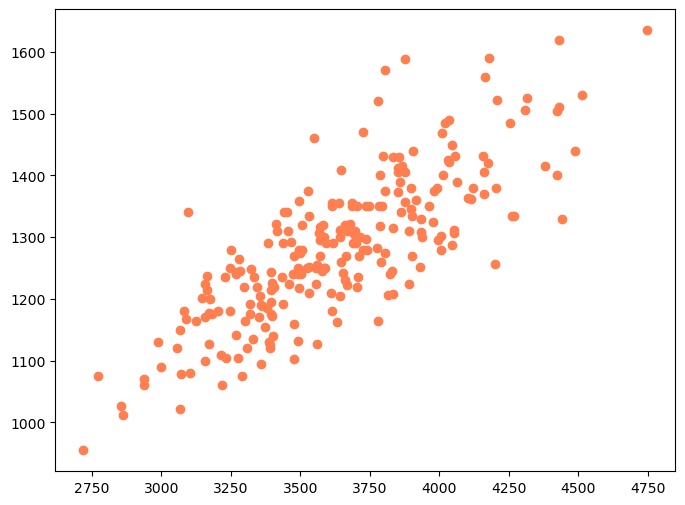

In [21]:
plt.figure(figsize = (8,6)) #inches
plt.scatter(X,y,color="coral")
plt.show()

In [7]:
# slope
mean_x = np.mean(X)
mean_y = np.mean(y)

In [8]:
mean_x,mean_y

(np.float64(3633.9915611814345), np.float64(1282.873417721519))

In [9]:
numer = 0
denom = 0
n = len(X)

for i in range(n):
    numer +=(y[i] - mean_y)*(X[i] - mean_x)
    denom +=(X[i] - mean_x)**2
slope = numer/denom

intercept = mean_y  - slope* mean_x    #c
print("Slope : ",slope)
print("Intercept: ",intercept)

Slope :  0.26342933948939945
Intercept:  325.57342104944223


In [10]:
#prediction
predictions = []
for i in range(n):
    y_pred = slope*X[i]+intercept
    predictions.append(int(y_pred))

In [11]:
print("Predictions : ",predictions[:5])
print("Actual : ",y[:5])

Predictions :  [1514, 1310, 1448, 1320, 1425]
Actual :  [1530 1297 1335 1282 1590]


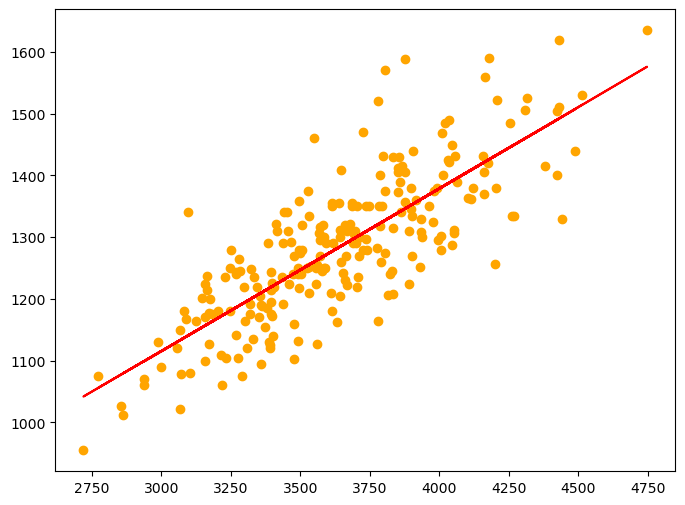

In [12]:
plt.figure(figsize = (8,6)) #inches
plt.scatter(X,y,color="orange")
plt.plot(X,predictions,'r')
plt.show()

In [13]:
#error 
error=0
for i in range(n):
    error+=(predictions[i]-y[i])**2
mse=error/n
print("Mean squared error is : ",mse)
print("RMSE: ",np.sqrt(mse))

Mean squared error is :  5202.9029535864975
RMSE:  72.13115106239812


# Gradient Descent

In [14]:
# error minimizes
from sklearn.preprocessing import MinMaxScaler

In [15]:
X = np.reshape(X,(-1,1))
y = np.reshape(y,(-1,1)) #No. of columns calculate

minmax =  MinMaxScaler()
#fit transform takes only 2D input 
scaled_x =  minmax.fit_transform(X)
scaled_y = minmax.fit_transform(y)

In [16]:
scaled_x[:5]

array([[0.88406512],
       [0.50222003],
       [0.7602368 ],
       [0.52146029],
       [0.71879625]])

In [17]:
# gradient descent (no. of epochs, alpha(learning rate):
def gradient_descent(epochs,alpha):   #epochs is no. of interatons
    slope,inter=0,0
    for i in range(epochs):
        y_pred = scaled_x*slope+inter
        loss = y_pred - scaled_y
        gradSlope = (2/n)*np.dot(loss.T,scaled_x)
        gradInter =  (2/n) *np.sum(loss)
        slope = slope - gradSlope*alpha
        inter = inter - gradInter*alpha
    return slope,inter

In [18]:
epochs=80
alpha=0.8
slope,inter = gradient_descent(epochs,alpha)
print("Slope : ",slope)
print("Intercept: ",inter)

Slope :  [[0.76637358]]
Intercept:  0.1347037453917121


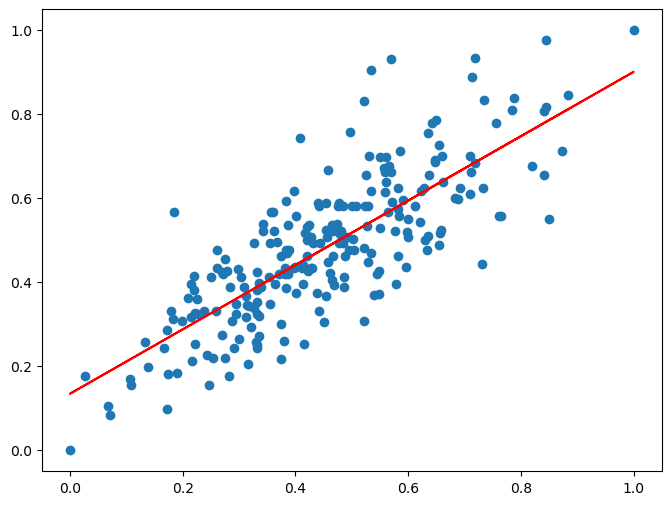

In [19]:
#prediction
predictions = []
for i in range(n):
    y_pred = slope[0][0]*scaled_x[i]+inter
    predictions.append(y_pred)
plt.figure(figsize = (8,6))
plt.scatter(scaled_x,scaled_y)
plt.plot(scaled_x,predictions,'r')
plt.show()